In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,28821,28822,28823,28824,28825,28826,28827,28828,28829,28830
customer_id,customer_id_39075,customer_id_34855,customer_id_7107,customer_id_31614,customer_id_34878,customer_id_24606,customer_id_13094,customer_id_36912,customer_id_27834,customer_id_9302,...,customer_id_41090,customer_id_16023,customer_id_21962,customer_id_37194,customer_id_16850,customer_id_6265,customer_id_11284,customer_id_38158,customer_id_860,customer_id_15795
age,31,31,47,36,34,48,34,34,39,40,...,33,35,45,60,38,60,39,37,42,31
job,admin.,technician,blue-collar,services,admin.,entrepreneur,blue-collar,technician,unemployed,technician,...,admin.,blue-collar,management,unemployed,management,retired,management,admin.,management,admin.
marital,married,single,married,married,single,married,single,single,single,single,...,single,married,married,divorced,married,married,married,married,married,single
education,university.degree,university.degree,basic.6y,university.degree,high.school,university.degree,basic.4y,professional.course,university.degree,professional.course,...,university.degree,basic.6y,university.degree,professional.course,unknown,professional.course,university.degree,high.school,university.degree,university.degree
default,no,no,unknown,no,no,no,unknown,no,no,no,...,no,no,no,no,unknown,unknown,no,no,no,no
housing,no,no,yes,no,no,yes,no,no,yes,unknown,...,no,yes,no,no,yes,no,no,yes,yes,yes
loan,no,no,no,no,no,yes,no,no,no,unknown,...,yes,no,no,yes,no,no,no,no,no,no
contact,cellular,telephone,telephone,cellular,cellular,cellular,cellular,cellular,cellular,telephone,...,cellular,cellular,cellular,cellular,cellular,telephone,telephone,cellular,telephone,cellular
month,dec,may,may,may,may,nov,jul,jun,mar,jun,...,nov,jul,aug,aug,jul,may,jun,oct,may,jul


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     28831 non-null  object 
 1   age             28831 non-null  int64  
 2   job             28831 non-null  object 
 3   marital         28831 non-null  object 
 4   education       28831 non-null  object 
 5   default         28831 non-null  object 
 6   housing         28831 non-null  object 
 7   loan            28831 non-null  object 
 8   contact         28831 non-null  object 
 9   month           28831 non-null  object 
 10  day_of_week     28831 non-null  object 
 11  duration        28831 non-null  float64
 12  campaign        28831 non-null  int64  
 13  pdays           28831 non-null  int64  
 14  previous        28831 non-null  int64  
 15  poutcome        28831 non-null  object 
 16  emp_var_rate    28831 non-null  float64
 17  cons_price_idx  28831 non-null 

In [4]:
df.drop('customer_id', axis=1, inplace=True)

In [5]:
x = df.drop('subscribed', axis=1)
y = df['subscribed']

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  object 
 2   marital         28831 non-null  object 
 3   education       28831 non-null  object 
 4   default         28831 non-null  object 
 5   housing         28831 non-null  object 
 6   loan            28831 non-null  object 
 7   contact         28831 non-null  object 
 8   month           28831 non-null  object 
 9   day_of_week     28831 non-null  object 
 10  duration        28831 non-null  float64
 11  campaign        28831 non-null  int64  
 12  pdays           28831 non-null  int64  
 13  previous        28831 non-null  int64  
 14  poutcome        28831 non-null  object 
 15  emp_var_rate    28831 non-null  float64
 16  cons_price_idx  28831 non-null  float64
 17  cons_conf_idx   28831 non-null 

In [7]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[ 1.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.3100e+01,
         1.7110e+00,  5.0235e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -3.2340e+01,
         2.2520e+00,  5.0991e+03],
       [ 0.0000e+00,  1.0000e+00,  0.0000e+00, ..., -2.5480e+01,
         5.8620e+00,  5.1910e+03],
       ...,
       [ 1.0000e+00,  0.0000e+00,  0.0000e+00, ..., -1.8830e+01,
         1.7560e+00,  5.0175e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.5480e+01,
         5.8580e+00,  5.1910e+03],
       [ 1.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.9890e+01,
         5.9620e+00,  5.2281e+03]])

In [8]:
# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [9]:
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2, random_state=42)

In [10]:
x_train

array([[ 0.0000e+00,  1.0000e+00,  0.0000e+00, ..., -2.9890e+01,
         5.9650e+00,  5.2281e+03],
       [ 1.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.9400e+01,
         5.1930e+00,  5.1958e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.5270e+01,
         5.9670e+00,  5.2281e+03],
       ...,
       [ 1.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.8560e+01,
         2.2680e+00,  5.0762e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.5270e+01,
         5.9700e+00,  5.2281e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.5480e+01,
         5.8620e+00,  5.1910e+03]])

In [11]:
x_test

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.6250e+01,
         1.8860e+00,  4.9636e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.9260e+01,
         5.9570e+00,  5.2281e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.5270e+01,
         5.9680e+00,  5.2281e+03],
       ...,
       [ 0.0000e+00,  1.0000e+00,  0.0000e+00, ..., -2.5270e+01,
         5.9670e+00,  5.2281e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.5270e+01,
         5.9670e+00,  5.2281e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.1980e+01,
         1.8270e+00,  5.0762e+03]])

In [12]:
y_test

18790    0
2240     0
26282    0
7439     0
2918     1
        ..
24072    0
13430    0
2684     0
1393     1
19612    0
Name: subscribed, Length: 5767, dtype: int64

In [13]:
y_train

2226     0
2534     0
9384     0
18570    0
9378     0
        ..
21575    0
5390     0
860      1
15795    0
23654    0
Name: subscribed, Length: 23064, dtype: int64

In [14]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
model.score(x_test, y_test)

0.9110456043003294

In [16]:
y_preds = model.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
print(confusion_matrix(y_test, y_preds))

[[4959  151]
 [ 362  295]]


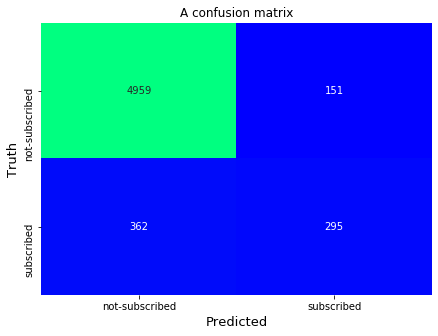

In [18]:
def ConfusionMatrix(ytest, ypred, label = ["Negative", "Positive"]):
    "A beautiful confusion matrix function to check the model performance"
    
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');
    
ConfusionMatrix(y_test, y_preds, label= ["not-subscribed", "subscribed"])

In [19]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5110
           1       0.66      0.45      0.53       657

    accuracy                           0.91      5767
   macro avg       0.80      0.71      0.74      5767
weighted avg       0.90      0.91      0.90      5767



In [20]:
# making the data like that of the training data
main_test = pd.read_csv('test.csv')
main_test.head().T

,0,1,2,3,4
customer_id,customer_id_32884,customer_id_3169,customer_id_32206,customer_id_9403,customer_id_14020
age,59,57,35,38,29
job,technician,unknown,blue-collar,admin.,housemaid
marital,married,married,married,married,married
education,high.school,unknown,basic.9y,high.school,high.school
default,no,unknown,no,no,no
housing,no,yes,no,no,yes
loan,yes,no,no,no,no
contact,cellular,telephone,cellular,telephone,cellular
month,may,may,may,jun,jul


In [21]:
#Dropping User ID column
Test = main_test.drop(["customer_id"], axis = 1)

In [22]:
Test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,59,technician,married,high.school,no,no,yes,cellular,may,mon,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,57,unknown,married,unknown,unknown,yes,no,telephone,may,thu,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,35,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,38,admin.,married,high.school,no,no,no,telephone,jun,fri,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,29,housemaid,married,high.school,no,yes,no,cellular,jul,fri,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,48,services,married,high.school,no,yes,no,cellular,jul,mon,3.016667,2,999,0,nonexistent,1.43,46.9590,-29.89,5.962,5228.1
12353,40,services,divorced,high.school,unknown,yes,no,cellular,apr,tue,10.333333,1,2,1,success,-1.77,46.5375,-32.97,2.455,5099.1
12354,28,blue-collar,single,high.school,no,no,yes,telephone,jul,mon,4.183333,2,999,0,nonexistent,1.43,46.9590,-29.89,5.964,5228.1
12355,53,technician,divorced,professional.course,no,no,yes,cellular,aug,fri,0.833333,3,999,0,nonexistent,1.43,46.7220,-25.27,5.968,5228.1


In [23]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_Test = transformer.fit_transform(Test)
transformed_Test

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -3.2340e+01,
         2.3010e+00,  5.0991e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.5480e+01,
         5.8620e+00,  5.1910e+03],
       [ 0.0000e+00,  1.0000e+00,  0.0000e+00, ..., -3.2340e+01,
         2.3150e+00,  5.0991e+03],
       ...,
       [ 0.0000e+00,  1.0000e+00,  0.0000e+00, ..., -2.9890e+01,
         5.9640e+00,  5.2281e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.5270e+01,
         5.9680e+00,  5.2281e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.9400e+01,
         5.1220e+00,  5.1958e+03]])

In [24]:
test_preds = model.predict(transformed_Test)
test_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
# formatting predictions according to kaggle format
df_preds = pd.DataFrame()
df_preds['customer_id'] = main_test['customer_id']
df_preds['subscribed'] = test_preds
df_preds

,customer_id,subscribed
0,customer_id_32884,0
1,customer_id_3169,0
2,customer_id_32206,0
3,customer_id_9403,0
4,customer_id_14020,0
...,...,...
12352,customer_id_15908,0
12353,customer_id_28222,0
12354,customer_id_14194,0
12355,customer_id_19764,0


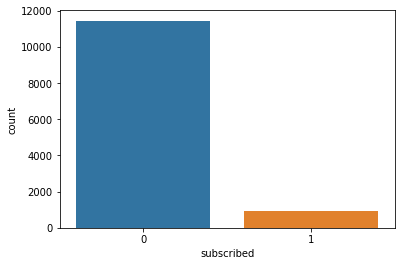

In [26]:
sns.countplot(x = "subscribed", data = df_preds);

In [27]:
#df_preds.to_csv('submission2.csv', index=False)

In [28]:
# creating a hyperparameter grid for randomforstclassifier
#rf_grid = {'n_estimators': np.arange(10, 1000, 50),
#           'max_depth': [None, 3, 5, 10],
#           'min_samples_split': np.arange(2, 20, 2),
#           'min_samples_leaf': np.arange(1, 20, 2)}

In [29]:
# Tuning RandomForestclassifier

#np.random.seed(42)
# setup random hyperparameter search for RandomForestclassifier
#rs_rf = RandomizedSearchCV(RandomForestClassifier(),
#                                param_distributions=rf_grid,
#                                cv=5,
#                                n_iter=50,
#                                verbose=True)
# fitting random hyperparameter search model for RandomForestClassifier
#rs_rf.fit(x_train, y_train)

In [30]:
#rs_rf.best_params_

In [31]:
#rs_rf.score(x_test, y_test)

In [32]:
%%time
best_model = RandomForestClassifier(n_estimators = 890,
                                    min_samples_split = 14,
                                    min_samples_leaf = 1,
                                    max_depth = None,
                                    random_state = 42)
best_model.fit(x_train, y_train)

Wall time: 37 s


RandomForestClassifier(min_samples_split=14, n_estimators=890, random_state=42)

In [33]:
best_model.score(x_test, y_test)

0.911565805444772

In [34]:
# Try different numbers of estimators (trees)... (no cross-validation)

#for i in range(500, 1000, 10):
#    print(f"Trying model with {i} estimators...")
#    new_model = RandomForestClassifier(n_estimators=i, min_samples_split = 14,
#                                    min_samples_leaf = 1,
#                                    max_depth = None,
#                                    random_state = 42).fit(x_train, y_train)
#    print(f"Model accuracy on test set: {new_model.score(x_test, y_test) * 100}%")
#    print("")

In [86]:
%%time
best_model2 = RandomForestClassifier(n_estimators = 880,
                                    min_samples_split = 14,
                                    min_samples_leaf = 1,
                                    max_depth = None,
                                    random_state = 42)
best_model2.fit(x_train, y_train)

Wall time: 47 s


RandomForestClassifier(min_samples_split=14, n_estimators=880, random_state=42)

In [36]:
best_model2.score(x_test, y_test)

0.9117392058262528

In [37]:
y_preds = best_model2.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
print(confusion_matrix(y_test, y_preds))

[[4984  126]
 [ 383  274]]


In [39]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5110
           1       0.69      0.42      0.52       657

    accuracy                           0.91      5767
   macro avg       0.81      0.70      0.73      5767
weighted avg       0.90      0.91      0.90      5767



In [40]:
test_preds = best_model2.predict(transformed_Test)
test_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# formatting predictions according to kaggle format
df_preds = pd.DataFrame()
df_preds['customer_id'] = main_test['customer_id']
df_preds['subscribed'] = test_preds
df_preds

,customer_id,subscribed
0,customer_id_32884,0
1,customer_id_3169,0
2,customer_id_32206,0
3,customer_id_9403,0
4,customer_id_14020,0
...,...,...
12352,customer_id_15908,0
12353,customer_id_28222,0
12354,customer_id_14194,0
12355,customer_id_19764,0


In [42]:
#df_preds.to_csv('submission3.csv', index=False)